In [1]:
!pip install selenium

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 9.6/9.6 MB 5.9 MB/s eta 0:00:00
     ---------------------------------------- 58.8/58.8 kB 3.0 MB/s eta 0:00:00
     -------------------------------------- 476.0/476.0 kB 9.9 MB/s eta 0:00:00
     ---------------------------------------- 63.0/63.0 kB ? eta 0:00:00


In [2]:
!pip install webdriver-manager

Defaulting to user installation because normal site-packages is not writeable


In [8]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service

In [18]:
def set_chrome_driver(run_as_headless=False):  # 크롬 드라이버를 생성하는 함수
    chrome_options = webdriver.ChromeOptions()
    
    # 필요한 경우 옵션을 수정 
    if run_as_headless:
        chrome_options.add_argument("--headless")  # 헤드리스 모드로 실행
        
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()),
                             options=chrome_options)
    return driver

### 시나리오
1. www.naver.com에 접속 
2. 검색 창에 검색어 입력
3. 검색 버튼 클릭


'<html lang="ko" data-useragent="mozilla/5.0 (windows nt 10.0; win64; x64) applewebkit/537.36 (khtml, like gecko) headlesschrome/128.0.0.0 safari/537.36" data-platform="win32"><head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta property="og:title" content="IPHONE : 네이버 검색"> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'IPHONE\'의 네이버 검색 결과입니다."> <meta name="description" lang="ko" content="\'IPHONE\'의 네이버 검색 결과입니다."> <title>IPHONE : 네이버 검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_32x32_240820.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver"><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search
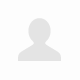
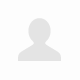

In [21]:
from selenium.webdriver.common.by import By

# 드라이버 얻어내기
# driver = set_chrome_driver()
driver = set_chrome_driver(run_as_headless=True) # ui 안뜨게 하기
# www.naver.com에 접속
driver.get("https://www.naver.com")

# 검색어 입력 : #query인 input 상자에 키워드 입력 
input_search = driver.find_element(By.ID, "query")
input_search.send_keys("IPHONE")

# 검색 수행 : .btn_search를 click
btn_search = driver.find_element(By.CLASS_NAME, "btn_search")
btn_search.click()

# 검색을 수행한 페이지 소스
driver.page_source

### 시나리오2
1. www.naver.com에 접속
2. 로그인 버튼 클릭
3. 아이디 입력창에 아이디 입력
4. 비밀번호 입력창에 비밀번호 입력
5. 로그인 버튼 클릭

In [20]:
# 브라우저 버튼 우클릭-검사-우클릭-copy-xpath
# 로그인 버튼의 XPath : //*[@id="account"]/div/a
driver = set_chrome_driver()
# naver.com 접속
driver.get("https://www.naver.com")

# 잠시만 기다립시다
# driver.implicitly_wait(3)

# 로그인 버튼 누르기
btn_login = driver.find_element(By.XPATH, "//*[@id=\"account\"]/div/a")
btn_login.click()

# -> 로그인 페이지로 이동

# 아이디 필드 채우기
input_id = driver.find_element(By.ID, "id")
input_id.send_keys("alice")
# 비밀번호 필드 채우기
input_pw = driver.find_element(By.ID, "pw")
input_pw.send_keys("1234")

# 로그인 버튼 누르기
btn_login = driver.find_element(By.CLASS_NAME, "btn_login")
# btn_login.click()